In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [130]:
train=pd.read_csv("hotel_train.csv")
test=pd.read_csv("hotel_test.csv")

In [131]:
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [132]:
train.shape

(38932, 5)

In [133]:
test.shape

(29404, 4)

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [135]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29404 entries, 0 to 29403
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       29404 non-null  object
 1   Description   29404 non-null  object
 2   Browser_Used  29404 non-null  object
 3   Device_Used   29404 non-null  object
dtypes: object(4)
memory usage: 919.0+ KB


In [136]:
train.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id42996,1
Description,38932,38932,This is a nice enough hotel in terms of lobby ...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [137]:
test.describe().transpose()

,count,unique,top,freq
User_ID,29404,29404,id101215,1
Description,29404,29404,Nothing.more than a crack motel.. The. Hotel h...,1
Browser_Used,29404,11,Firefox,5676
Device_Used,29404,3,Desktop,11349


EDA

In [138]:
train.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [139]:
test.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
dtype: int64

Percentage
happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


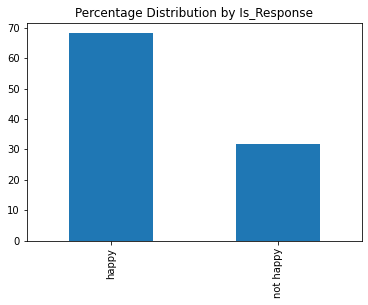

In [140]:
%matplotlib inline
print("Percentage")
print(round(train.Is_Response.value_counts(normalize=True)*100,2))
round(train.Is_Response.value_counts(normalize=True)*100,2).plot(kind="bar")
plt.title("Percentage Distribution by Is_Response")
plt.show()

In [141]:
#Remove Columns
train.drop(columns=["User_ID","Browser_Used","Device_Used"],inplace=True)
train.head(2)

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy


In [142]:
#Remove Columns
test.drop(columns=["User_ID","Browser_Used","Device_Used"],inplace=True)
test.head(2)

,Description
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...


In [143]:
#Apply first level Cleaning
import re
import string

#Convert to lower-case, removes square bracket, removes numbers and puntuaction
def text_clean_1(text):
    text=text.lower()
    test=re.sub("\[.*?\]",'',text)
    text=re.sub("[%s]" %re.escape(string.punctuation),'',text)
    return text

cleaned_1=lambda x:text_clean_1(x)

In [144]:
#Take a look at updated text on TRAIN
train["cleaned_des"]=pd.DataFrame(train.Description.apply(cleaned_1))
train.head(2)

,Description,Is_Response,cleaned_des
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...


In [145]:
#Take a look at updated text on TEST
test["cleaned_des"]=pd.DataFrame(test.Description.apply(cleaned_1))
test.head(2)

,Description,cleaned_des
0,Looking for a motel in close proximity to TV t...,looking for a motel in close proximity to tv t...
1,Walking distance to Madison Square Garden and ...,walking distance to madison square garden and ...


In [146]:
#Apply second round cleaning
def text_clean_2(text):
    text=re.sub('[''""_]','',text)
    text=re.sub("\n",'',text)
    return text

cleaned_2=lambda x:text_clean_2(x)

In [147]:
#Take a look at updated text on TRAIN
train["cleaned_des_new"]=pd.DataFrame(train["cleaned_des"].apply(cleaned_2))
train.head(2)

,Description,Is_Response,cleaned_des,cleaned_des_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...


In [148]:
#Take a look at updated text on TEST
test["cleaned_des_new"]=pd.DataFrame(test["cleaned_des"].apply(cleaned_2))
test.head(2)

,Description,cleaned_des,cleaned_des_new
0,Looking for a motel in close proximity to TV t...,looking for a motel in close proximity to tv t...,looking for a motel in close proximity to tv t...
1,Walking distance to Madison Square Garden and ...,walking distance to madison square garden and ...,walking distance to madison square garden and ...


In [149]:
#Update Columns
test.drop(columns=["Description","cleaned_des"],inplace=True)
test.head(2)

,cleaned_des_new
0,looking for a motel in close proximity to tv t...
1,walking distance to madison square garden and ...


Model Training

In [50]:
x=train.cleaned_des_new
y=train.Is_Response

In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=250)

In [57]:
print("x_train: ",len(x_train))
print("x_test: ",len(x_test))
print("y_tarin: ",len(y_train))
print("y_test: ",len(y_test))

x_train:  27252
x_test:  11680
y_tarin:  27252
y_test:  11680


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec=TfidfVectorizer()

from sklearn.pipeline import Pipeline

Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="lbfgs")

lr_model=Pipeline([('vectorizer',tvec),("classifier",lr)])
lr_model.fit(x_train,y_train)
predictions=lr_model.predict(x_test)

print("Confusion Matrix: ",confusion_matrix(predictions,y_test))
print("Accuracy: ",accuracy_score(predictions,y_test))
print("Precision: ",precision_score(predictions,y_test,average="weighted"))
print("Recall: ",recall_score(predictions,y_test,average="weighted"))

Confusion Matrix:  [[7492  913]
 [ 522 2753]]
Accuracy:  0.8771404109589042
Precision:  0.8832969626859267
Recall:  0.8771404109589042


DecisionTree

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt_model=Pipeline([('vectorizer',tvec),("classifier",dt)])
dt_model.fit(x_train,y_train)
predictions=dt_model.predict(x_test)

print("Confusion Matrix: ",confusion_matrix(predictions,y_test))
print("Accuracy: ",accuracy_score(predictions,y_test))
print("Precision: ",precision_score(predictions,y_test,average="weighted"))
print("Recall: ",recall_score(predictions,y_test,average="weighted"))

Confusion Matrix:  [[6537 1554]
 [1477 2112]]
Accuracy:  0.7404965753424657
Precision:  0.7420760825592017
Recall:  0.7404965753424657


SVC

In [110]:
from sklearn.svm import SVC
sv=SVC()

sv_model=Pipeline([('vectorizer',tvec),("classifier",sv)])
sv_model.fit(x_train,y_train)
predictions=sv_model.predict(x_test)

print("Confusion Matrix: ",confusion_matrix(predictions,y_test))
print("Accuracy: ",accuracy_score(predictions,y_test))
print("Precision: ",precision_score(predictions,y_test,average="weighted"))
print("Recall: ",recall_score(predictions,y_test,average="weighted"))

Confusion Matrix:  [[7490  892]
 [ 524 2774]]
Accuracy:  0.8787671232876713
Precision:  0.8843731808273858
Recall:  0.8787671232876713


Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

gb_model=Pipeline([('vectorizer',tvec),("classifier",gb)])
gb_model.fit(x_train,y_train)
predictions=gb_model.predict(x_test)

print("Confusion Matrix: ",confusion_matrix(predictions,y_test))
print("Accuracy: ",accuracy_score(predictions,y_test))
print("Precision: ",precision_score(predictions,y_test,average="weighted"))
print("Recall: ",recall_score(predictions,y_test,average="weighted"))

Confusion Matrix:  [[7551 1543]
 [ 463 2123]]
Accuracy:  0.8282534246575343
Precision:  0.8618296641645454
Recall:  0.8282534246575343


In [160]:
result=sv_model.predict(test)

In [155]:
ex=["It's very bad"]
sv_model.predict(ex)

array(['not happy'], dtype=object)